<a href="https://colab.research.google.com/github/iIsunnyIi/COVID19_SCREENING/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Diagnoise based on Chest x-ray 

# DesNet with CNN

Importing the Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('Data_test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import cv2                 
import numpy as np         
import os                  
from random import shuffle
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

Exploration of Dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#read DataSet
TrainImage="/content/drive/MyDrive/Data_test/test"
TestImage="/content/drive/MyDrive/Data_test/train/"

print(TrainImage)
print(TestImage)

/content/drive/MyDrive/Data_test/test
/content/drive/MyDrive/Data_test/train/


In [21]:
#to get all image names in train file
Pneumonaimages = os.listdir(TrainImage + "/PNEUMONIA")
Normalimages = os.listdir(TrainImage + "/NORMAL")
COVID19images = os.listdir(TrainImage + "/COVID19")

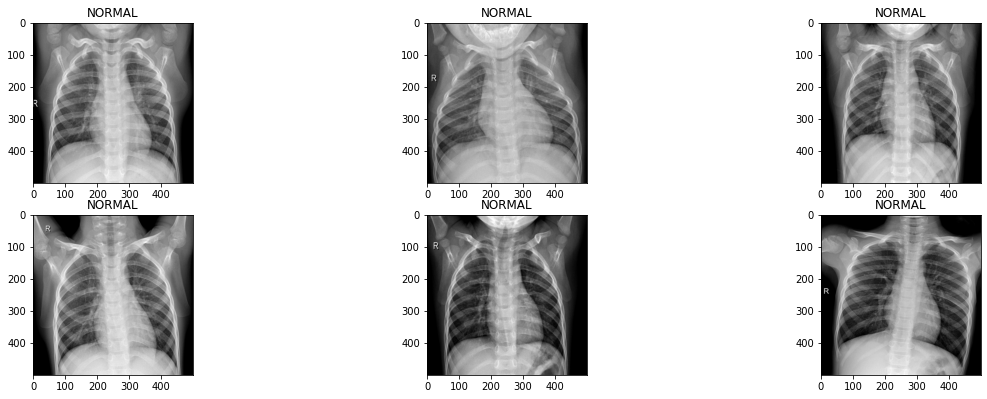

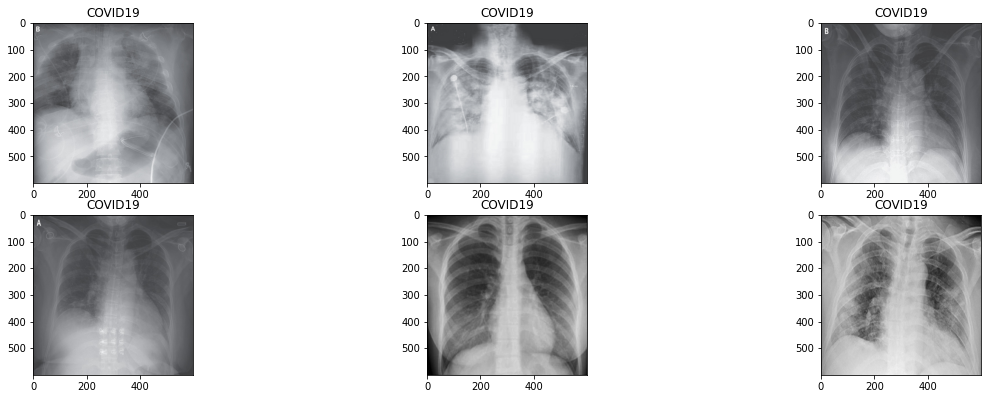

In [27]:
#plot to show the size of some image
#plot PNEUMONIA
#plt.figure(figsize=(20,10))
#for i in range(6):
    #plt.subplot(3, 3, i + 1)
    #plt.imshow(plt.imread(os.path.join(TrainImage + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    #plt.title("PNEUMONIA")
    
#plt.show()

#plot NORMAL
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")

plt.show()
#plot 
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/COVID19",COVID19images[i])),cmap='gray')
    plt.title("COVID19")


Feature Extraction

In [29]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
                                  )

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator =train_datagen.flow_from_directory(
     TrainImage,
     batch_size= 256,
     shuffle=shuffle,
     target_size=(300, 300)

)

test_generator =train_datagen.flow_from_directory(
     TestImage,
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)

)


Found 47 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [30]:
trainShape=train_generator.__getitem__(0)[0].shape
testShape=test_generator.__getitem__(0)[0].shape

In [31]:
#Shape of Data
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (47, 300, 300, 3)
Test Shape 
 (47, 300, 300, 3)


In [32]:
Labels={'NORMAL':0,'COVID19':1,'PNEUMONIA':2}

# convert label to code
def getCode(label):
    return Labels[label]


# convert code to label 
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
        
        
#Test        
print(getCode('COVID19'))
print(getLabel(1))

1
COVID19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


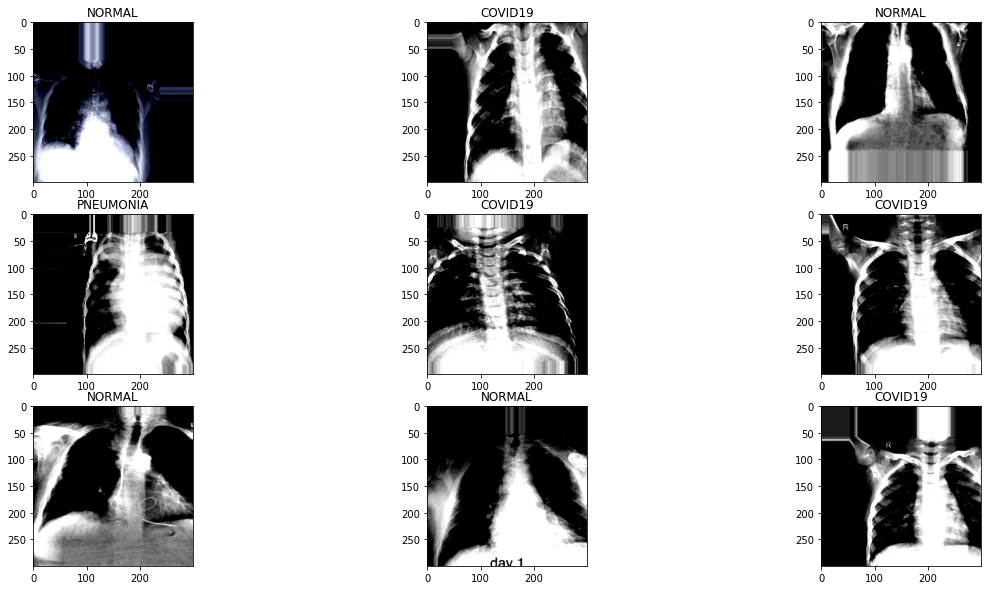

In [33]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_generator.__getitem__(0)[0][i])
    plt.title(getLabel(np.argmax(train_generator.__getitem__(0)[1][i])) )

Data Splitting for DesNet Model

In [34]:
import glob as gb
import cv2  
sizeImage=300 # to resize the all image as same size

#to read all images from directory
def getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in  os.listdir(Dir) : #to get the file name 
        files = gb.glob(pathname= str( Dir  +"/" +folder+ '//*.jpg' )) # to get the images
        for file in files:
                picture=cv2.imread(file) #  or plt.imread(file)
                imageArray=cv2.resize(picture,(sizeImage,sizeImage))
                X.append(list(imageArray))
                y.append(getCode(folder))
    X=np.array(X)
    y=np.array(y)
    return X,y

In [37]:
#get train data
X_train, y_train = getData(TrainImage,sizeImage)
# get test data
X_test , y_test = getData(TestImage,sizeImage)

In [38]:
print("X_train Shape",X_train.shape)
print("X_test Shape ",X_test.shape)

X_train Shape (47, 300, 300, 3)
X_test Shape  (47, 300, 300, 3)


In [39]:
# #Convert y_train to categorical
y_train=to_categorical(y_train,3)
print("y_train ",y_train.shape)
#Convert y_train to categorical
y_test=to_categorical(y_test,3)
print("y_test ",y_test.shape)

y_train  (47, 3)
y_test  (47, 3)


Loading Pre-trained Weigh Model

In [40]:
#load weight
Network_Weight="Model/DenseNet-BC-169-32-no-top.h5"
print(Network_Weight)

Model/DenseNet-BC-169-32-no-top.h5


Model Building for DesNet

In [41]:
from tensorflow.keras.applications.densenet import DenseNet169
pre_trained_model = DenseNet169(input_shape = (sizeImage, sizeImage, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(Network_Weight)
for layer in pre_trained_model.layers:
    layer.trainable = False  #to make the layers to Freeze Weights
pre_trained_model.summary()

OSError: ignored

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [43]:
from tensorflow.keras import Model
x = tf.keras.layers.Flatten()(pre_trained_model.output)
#Full Connected Layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x=tf.keras.layers.Dense(3 , activation='sigmoid')(x)   
model = Model( pre_trained_model.input, x) 

In [44]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 2 ,verbose = 1, factor = 0.2, min_lr = 0.00001)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv5_block9_2_conv (Conv2D)    (None, 9, 9, 32)     36864       conv5_block9_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block9_concat (Concatenat (None, 9, 9, 928)    0           conv5_block8_concat[0][0]        
                                                                 conv5_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block10_0_bn (BatchNormal (None, 9, 9, 928)    3712        conv5_block9_concat[0][0]        
__________________________________________________________________________________________________
conv5_block10_0_relu (Activatio (None, 9, 9, 928)    0           conv5_block10_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block10_1_conv (Conv2D)   (None, 9, 9, 128)    118784      conv5_block10_0_relu[0][0]       
__________

In [45]:
callback_list = [reduction_lr]

Model Training with 30 Epochs

In [46]:
history = model.fit_generator(train_generator,steps_per_epoch=1,callbacks = callback_list,epochs=30)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1/1 [==============================] - 26s 26s/step - loss: 1.2135 - accuracy: 0.3617
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 11.7304 - accuracy: 0.4255
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 11.9719 - accuracy: 0.4468
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 7.7071 - accuracy: 0.4468
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 3.3164 - accuracy: 0.5319
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 2.7784 - accuracy: 0.5106
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 1.4192 - accuracy: 0.5106
Epoch 8/30


ResourceExhaustedError: ignored

# Accuracy for DesNet Model

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Evaluate Model
val1 = model.evaluate(test_generator, batch_size=1)

In [ ]:
Desnet_ACC = val1[1]

# COVNet with CNN-2D

Importing Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Conv2D, add, Activation
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer, BatchNormalization, LocallyConnected2D, ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,AveragePooling2D, GaussianNoise, UpSampling2D, Input)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import applications
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import time
import numpy as np
import warnings
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
from skimage import io

Using TensorFlow backend.


Data Exploration

In [ ]:

train_dir = 'Data_test/train'
test_dir = 'Data_test/test'

image_size = 224

Feature Extraction

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True,
                            fill_mode="nearest")

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode="categorical")


Found 47 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=32,
                                            class_mode="categorical")

Found 47 images belonging to 3 classes.


Model Building

In [ ]:

#=================================================================
chanDim = 1
model = Sequential(name="COVNet")
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation("softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 2 ,verbose = 1, factor = 0.2, min_lr = 0.00001)
model.summary()
plot_model(model,show_shapes=True)


Model: "COVNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        65600

In [ ]:
callback_list = [reduction_lr]

Model Training

In [ ]:
start = time.time()

history = model.fit_generator(train_data,
                    steps_per_epoch = 30,
                    validation_data = test_data,
                    validation_steps = 30,
                    epochs=100,
                    callbacks = callback_list)
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Epoch 1/100
30/30 [==============================] - 1164s 39s/step - loss: 2.9110 - accuracy: 0.5645 - val_loss: 6.1645 - val_accuracy: 0.5106
Epoch 2/100
30/30 [==============================] - -2571s -85706365us/step - loss: 1.8283 - accuracy: 0.6383 - val_loss: 2.8889 - val_accuracy: 0.5319
Epoch 3/100
30/30 [==============================] - 957s 32s/step - loss: 1.1056 - accuracy: 0.6908 - val_loss: 4.7127 - val_accuracy: 0.4468
Epoch 4/100
29/30 [============================>.] - ETA: 24s - loss: 0.9203 - accuracy: 0.6969
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 971s 32s/step - loss: 0.9097 - accuracy: 0.7007 - val_loss: 2.0216 - val_accuracy: 0.4468
Epoch 5/100
30/30 [==============================] - -2517s -83911389us/step - loss: 0.8156 - accuracy: 0.7418 - val_loss: 2.7602 - val_accuracy: 0.4468
Epoch 6/100
29/30 [============================>.] - ETA: 28s - loss: 0.7247 - accuracy: 0.7478
Epo

# Accuracy for CovNet Model

In [ ]:
def plot_graph(history,string):
    plt.figure(figsize=(12,8))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label="val_"+str(string))
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [ ]:
#Evaluate Model
val2 = model.evaluate(test_data, batch_size=1)

In [ ]:
CON_ACC = val2[1]

# Model Saving

In [ ]:
model.save("COVNet.h5")

In [ ]:
_+-